In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8497367566893141538,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10078846976
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17531116108437281717
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"]

In [3]:
tf.__version__

'2.5.0'

In [4]:
train_X = pd.read_csv('../data/train.csv').to_numpy()[:, 1:33]
train_Y = pd.read_csv('../data/train.csv').to_numpy()[:, 33]

print(np.unique(train_Y))

[0. 1. 2. 3.]


[ -6.1494632   -0.92971357   9.05836761  -7.01785369  -2.95847138
   0.179233    -0.95659101  -0.97240086   5.95621278   4.14563573
  25.01764496  -4.06125365   0.99663162  -3.83734549 -13.95699405
  -2.04295728   2.13020964  -1.95766247  -1.14993047   6.08202762
   0.8786122    5.09310164  -6.06664753  -7.02643577  -6.00628223
  -6.00583611   7.04308355  21.88465021  -3.06415192  -5.2475518
  -6.02610749 -11.9908216 ]


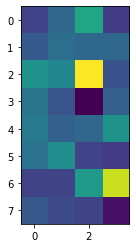

In [5]:
%matplotlib inline
print(train_X[0])

plt.imshow(train_X[0].reshape((8, 4)))

[-0.43776871  0.01283528  0.36702599 -0.44186102 -0.22958889  0.08241698
 -0.0607833  -0.00233294  0.56222051  0.65694049  0.99469012 -0.20766559
  0.12516799 -0.40348996 -0.52742155 -0.05894667  0.26518511 -0.17375546
 -0.02196712  0.4230557   0.12480023  0.77306941 -0.22853245 -0.40354838
 -0.42254303 -0.72812096  0.27488664  1.43228101 -0.20089462 -0.59425977
 -0.21874098 -0.69014602]


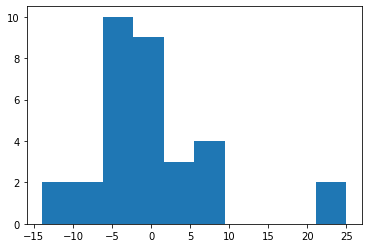

In [6]:
plt.hist(train_X[0])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)

print(train_X[0])

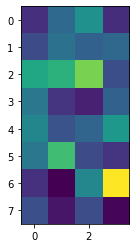

In [7]:
plt.imshow(train_X[0].reshape((8, 4)))

(array([4., 5., 6., 8., 2., 3., 2., 1., 0., 1.]),
 array([-0.72812096, -0.51208076, -0.29604057, -0.08000037,  0.13603983,
         0.35208002,  0.56812022,  0.78416042,  1.00020061,  1.21624081,
         1.43228101]),
 <BarContainer object of 10 artists>)

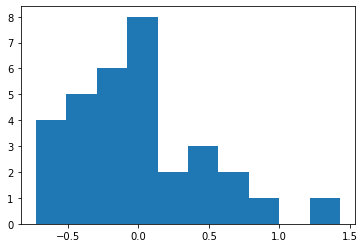

In [8]:

plt.hist(train_X[0])

In [9]:
train_X = train_X.reshape(-1, 8, 4)
train_X_add = np.zeros_like(train_X)
print(train_X_add.shape)
print(train_X.shape)

(2335, 8, 4)
(2335, 8, 4)


In [10]:
# for j in range(8):
#     train_X_add[:, j, :] = train_X[:, j, ::-1]

# print(train_X_add[0].reshape((8, 4)))
# print(train_X[0].reshape((8, 4)))

# train_X = np.concatenate([train_X, train_X_add], axis=0)
# train_Y = np.concatenate([train_Y, train_Y], axis=0)

In [11]:
print(train_X.shape)
print(train_Y.shape)

(2335, 8, 4)
(2335,)


In [12]:
print(train_Y[0:10])
print(train_Y[0+2335:10+2335])

[1. 1. 0. 1. 2. 2. 1. 2. 1. 3.]
[]


In [13]:
# print(train_X[0])
# print(train_X[2335])

In [14]:
print(train_X.shape)
print(train_Y.shape)

(2335, 8, 4)
(2335,)


In [15]:
train_x, x_test, train_y, y_test = train_test_split(train_X, train_Y, test_size=0.2, shuffle=True, stratify=train_Y, random_state=34)
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.25, shuffle=True, stratify=train_y, random_state=40)

print(x_train.shape)
print(y_train.shape)
print()
print(x_valid.shape)
print(y_valid.shape)
print()
print(x_test.shape)
print(y_test.shape)

(1401, 8, 4)
(1401,)

(467, 8, 4)
(467,)

(467, 8, 4)
(467,)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (64, 1, 8, 4)             0         
_________________________________________________________________
conv2d_31 (Conv2D)           (64, 128, 8, 4)           640       
_________________________________________________________________
batch_normalization_45 (Batc (64, 128, 8, 4)           16        
_________________________________________________________________
dropout_52 (Dropout)         (64, 128, 8, 4)           0         
_________________________________________________________________
conv2d_32 (Conv2D)           (64, 256, 8, 4)           131328    
_________________________________________________________________
batch_normalization_46 (Batc (64, 256, 8, 4)           16        
_________________________________________________________________
dropout_53 (Dropout)         (64, 256, 8, 4)          

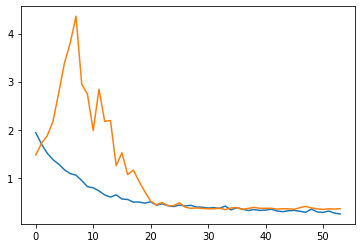

15/15 [==============================] - 0s 5ms/step - loss: 0.3587 - accuracy: 0.8758
loss= 0.35866236686706543
acc= 0.8758029937744141


In [34]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, BatchNormalization, Flatten, GlobalAveragePooling2D, InputLayer, Reshape
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()

model.add(InputLayer((1, 8, 4), 64))
model.add(Reshape((1, 8, 4)))
model.add(Conv2D(128, (2, 2), activation='relu', padding='same', data_format='channels_first'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(256, (2, 2), activation='relu', padding='same', data_format='channels_first'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(256, (2, 2), activation='relu', padding='same', data_format='channels_first'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(256, (2, 2), activation='relu', padding='same', data_format='channels_first'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(256, (2, 2), activation='relu', data_format='channels_first'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1028, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 이게 거의 최적.

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

model.summary()

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    epochs=300, 
    batch_size=64, 
    callbacks=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, acc = model.evaluate(x_test, y_test)
print("loss=", loss)
print("acc=", acc)

In [32]:
sample_submission = pd.read_csv('../data/sample_submission.csv')
test_data = pd.read_csv('../data/test.csv').to_numpy()[:, 1:]
test_data = scaler.fit_transform(test_data).reshape(-1, 1, 8, 4)

output = np.argmax(model(test_data), axis=1)
print(output)
# for i, data in enumerate(test_data):
#     outputs = model.forward(data)
#     batch_index = i * batch_size
#     max_vals, max_indices = torch.max(outputs, 1)
#     sample_submission.iloc[batch_index:batch_index + batch_size, 1:] = max_indices.long().cpu().numpy()[:,np.newaxis]
# sample_submission.to_csv('version30.csv', index=False)

[0 0 1 ... 2 0 3]


In [33]:
sample_submission['target'] = output.astype('uint8')
sample_submission.to_csv('version2.csv', index=False)